In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import pandas as pd
X_test = pd.read_csv('test.csv')
X = pd.read_csv('train.csv')

In [24]:
y = X['SalePrice']
X.dropna(axis=0, subset=['SalePrice'], inplace=True) #drop null row of "SalePrice" column
X.drop(['SalePrice'], axis=1, inplace=True)

In [25]:
X = X.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,619,20,90.0,11694,9,5,2007,2007,452.0,48,...,774,0,108,0,0,260,0,0,7,2007
870,871,20,60.0,6600,5,5,1962,1962,0.0,0,...,308,0,0,0,0,0,0,0,8,2009
92,93,30,80.0,13360,5,7,1921,2006,0.0,713,...,432,0,0,44,0,0,0,0,8,2009
817,818,20,NaN,13265,8,5,2002,2002,148.0,1218,...,857,150,59,0,0,0,0,0,7,2008
302,303,20,118.0,13704,7,5,2001,2002,150.0,0,...,843,468,81,0,0,0,0,0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,...,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,...,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,...,539,0,0,0,0,0,0,0,4,2010
559,560,120,NaN,3196,7,5,2003,2004,18.0,0,...,420,143,20,0,0,0,0,0,10,2006


In [27]:
#Handle Missing Value
X.shape
columns_with_missing_values = X.isnull().sum()
print(columns_with_missing_values[columns_with_missing_values>0])
print(f'Total missing rows: {columns_with_missing_values[columns_with_missing_values>0].sum()}')
print(f'Shape of data: {X.shape}')

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
Total missing rows: 348
Shape of data: (1460, 37)


In [28]:
#prediction model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
def mean_absolute_error_model(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mae = (mean_absolute_error(y_valid, preds))
    return mae

In [29]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))
#imputed_X_train.isnull().sum()
#imputed_X_valid.isnull().sum()

In [30]:
mean_absolute_error_model(imputed_X_train, imputed_X_valid, y_train, y_valid)

18250.608013698627

In [31]:
#X_test.isnull().sum()

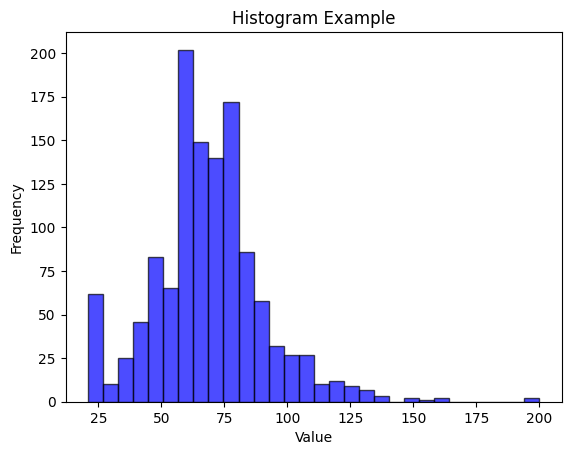

In [32]:
import matplotlib.pyplot as plt
plt.hist(X_test["LotFrontage"], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

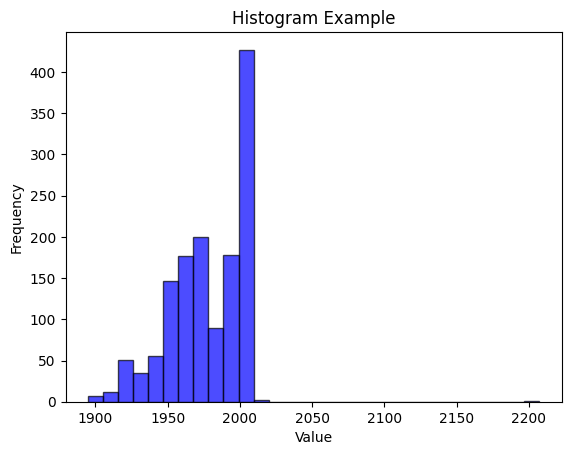

In [33]:
import matplotlib.pyplot as plt
plt.hist(X_test["GarageYrBlt"], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

From the visualization we can see most of column with missing data is skewness. Therefore, using "median" imputation is a better choice more then "mean" method

In [34]:
#preprocessing testing data
my_final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(my_imputer.transform(X_valid))
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [35]:
#build model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)
preds_valid = model.predict(final_X_valid)
print(mean_absolute_error(y_valid, preds_valid))

18250.608013698627


In [42]:
#Final test
final_X_test = pd.DataFrame(my_final_imputer.fit_transform(X_test))
final_X_test.columns = X_test.columns
final_preds = model.predict(final_X_test)
final_X_test["SalePrice"] = final_preds
final_X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,126156.76
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,154207.00
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,179607.24
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,181815.82
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,198088.00
